<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Modeling
</div>

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [191]:
product_df = pd.read_csv('../data/processed/preprocess_QCL.csv')
population_df = pd.read_csv('../data/processed/preprocess_OA.csv')
agri_pop_df = pd.read_csv('../data/processed/preprocess_OEA.csv')
value_df = pd.read_csv('../data/processed/preprocess_QV.csv')

In [192]:
element_df = pd.read_csv('../data/external/element_code.csv')
item_df = pd.read_csv('../data/external/item_code.csv')
indicator_df = pd.read_csv('../data/external/indicator_code.csv')

# Model 02: Rice and Maize's Production Prediction Linear Regression Model
-   Using 6 features: `Rural population (1000 No)`, `Total Population - Both sexes (1000 No)`, `Total Population - Female (1000 No)	`, `Total Population - Male (1000 No)`, `Urban population (1000 No)`, `Area Harvest`

### Pre-process data to use for model 2

In [193]:
population_df = population_df.merge(element_df, how= 'left', on= 'Element Code')
population_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element
0,OA,237,511,3010,1950,1000 No,25109.200,X,NaN,Total Population - Both sexes (1000 No)
1,OA,237,512,3010,1950,1000 No,12408.031,X,NaN,Total Population - Male (1000 No)
2,OA,237,513,3010,1950,1000 No,12701.169,X,NaN,Total Population - Female (1000 No)
3,OA,237,551,3010,1950,1000 No,21921.843,X,NaN,Rural population (1000 No)
4,OA,237,561,3010,1950,1000 No,2888.063,X,NaN,Urban population (1000 No)
...,...,...,...,...,...,...,...,...,...,...
650,OA,237,512,3010,2099,1000 No,46560.058,X,NaN,Total Population - Male (1000 No)
651,OA,237,513,3010,2099,1000 No,44913.397,X,NaN,Total Population - Female (1000 No)
652,OA,237,511,3010,2100,1000 No,91036.732,X,NaN,Total Population - Both sexes (1000 No)
653,OA,237,512,3010,2100,1000 No,46342.743,X,NaN,Total Population - Male (1000 No)


-   As we can see we have 5 kind of data for 1 year in the dataframe, we have to reorganize population_df if we want to use it
-   Solution: change to dataframe with index is each year, 5 columns of 5 different kind of data

In [194]:
population_df = population_df.pivot(index= 'Year', columns= 'Element', values= 'Value').reset_index()
population_df

Element,Year,Rural population (1000 No),Total Population - Both sexes (1000 No),Total Population - Female (1000 No),Total Population - Male (1000 No),Urban population (1000 No)
0,1950,21921.843,25109.200,12701.169,12408.031,2888.063
1,1951,22341.053,25627.533,12986.858,12640.675,3023.400
2,1952,22806.351,26189.593,13294.186,12895.406,3170.487
3,1953,23316.645,26820.851,13635.315,13185.537,3329.527
4,1954,23869.466,27507.453,13996.163,13511.290,3501.236
...,...,...,...,...,...,...
146,2096,NaN,92769.682,45571.738,47197.944,NaN
147,2097,NaN,92339.695,45351.840,46987.855,NaN
148,2098,NaN,91907.988,45132.670,46775.318,NaN
149,2099,NaN,91473.455,44913.397,46560.058,NaN


-   Get data of `Rice` and `Maize (corn)`

In [195]:
raw_data = product_df[product_df['Item Code'].isin([56, 27])] # Get data of Rice and Maize
raw_data

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note
4565,QCL,237,5312,56,1961,ha,260200.00,A,NaN
4566,QCL,237,5419,56,1961,100 g/ha,11230.00,E,NaN
4567,QCL,237,5510,56,1961,t,292200.00,A,NaN
4568,QCL,237,5312,56,1962,ha,262020.00,X,Unofficial figure
4569,QCL,237,5419,56,1962,100 g/ha,11987.00,X,Unofficial figure
...,...,...,...,...,...,...,...,...,...
10162,QCL,237,5419,27,2020,100 g/ha,59212.00,A,NaN
10163,QCL,237,5510,27,2020,t,42764999.76,A,NaN
10164,QCL,237,5312,27,2021,ha,7219797.00,A,NaN
10165,QCL,237,5419,27,2021,100 g/ha,60740.00,A,NaN


-   Get the area harvest

In [196]:
area_df = raw_data[raw_data['Element Code'] == 5312]
area_df = area_df.drop(columns=['Domain Code', 'Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Unit', 'Flag', 'Note'])
area_df = area_df.rename(columns={'Value' : 'Area Harvest'})
area_df

,Year,Area Harvest
4565,1961,260200.0
4568,1962,262020.0
4571,1963,272750.0
4574,1964,257000.0
4577,1965,277400.0
...,...,...
10152,2017,7708534.0
10155,2018,7570741.0
10158,2019,7451544.0
10161,2020,7222403.0


-   Merge all the data that we need to one

In [197]:
data = raw_data[raw_data['Element Code'] == 5510]
data = data.merge(population_df, how= 'left', on= 'Year')
data = data.merge(area_df, how= 'left', on= 'Year')

In [198]:
data

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Rural population (1000 No),Total Population - Both sexes (1000 No),Total Population - Female (1000 No),Total Population - Male (1000 No),Urban population (1000 No),Area Harvest
0,QCL,237,5510,56,1961,t,292200.00,A,NaN,28606.192,33621.982,17086.013,16535.970,5060.580,260200.0
1,QCL,237,5510,56,1961,t,292200.00,A,NaN,28606.192,33621.982,17086.013,16535.970,5060.580,4744000.0
2,QCL,237,5510,56,1962,t,314085.00,X,Unofficial figure,29353.433,34533.889,17548.591,16985.297,5330.732,262020.0
3,QCL,237,5510,56,1962,t,314085.00,X,Unofficial figure,29353.433,34533.889,17548.591,16985.297,5330.732,4888860.0
4,QCL,237,5510,56,1963,t,253840.00,X,Unofficial figure,30108.893,35526.727,18053.403,17473.324,5613.198,272750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,QCL,237,5510,27,2019,t,43495487.58,A,NaN,61742.331,95776.716,48488.283,47288.433,35686.730,7451544.0
240,QCL,237,5510,27,2020,t,42764999.76,A,NaN,61632.897,96648.685,48922.527,47726.158,36727.248,939563.0
241,QCL,237,5510,27,2020,t,42764999.76,A,NaN,61632.897,96648.685,48922.527,47726.158,36727.248,7222403.0
242,QCL,237,5510,27,2021,t,43852728.69,A,NaN,61504.284,97468.029,49331.842,48136.186,37779.862,900673.0


### Choose features to train

In [199]:
def get_data(data, itemCode):

    ratio = [0.6, 0.3, 0.1] #ratio for train, validation, and test
    data = data[data['Item Code'] == itemCode]
    data = data.sample(frac= 1)

    data = data.drop(columns= ['Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Year', 'Unit', 'Year', 'Flag', 'Note'])

    data_train = data.iloc[:int(ratio[0]*len(data)), :]
    data_validation = data.iloc[int(ratio[0]*len(data)) : (int(ratio[0]*len(data)) + int(ratio[1]*len(data))), :]
    data_test =  data.iloc[(int(ratio[0]*len(data)) + int(ratio[1]*len(data))) :, :]

    X_train = data_train.iloc[:, 1:]
    y_train = data_train.iloc[:, :-5]

    X_validation = data_validation.iloc[:, 1:]
    y_validation = data_validation.iloc[:, :-5]

    X_test = data_test.iloc[:, 1:]
    y_test = data_test.iloc[:, :-5]

    return X_train, y_train, X_validation, y_validation, X_test, y_test


-   Split data to 3 set for train, validate, and test (with ratio of 6:3:1)

In [208]:
def main_model_2(itemCode):
    X_train, y_train, X_validation, y_validation,  X_test, y_test = get_data(data, itemCode)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    print("Coefficient of determination of the prediction on Validation set", lr.score(X_validation, y_validation))

    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred= y_pred)
    return mae


-   Now let run it 20 times

In [237]:
history_maize = {}
history_rice = {}

# corn first
for epoch in range(20):
    test_mae = main_model_2(56)
    history_maize[epoch] = {test_mae}

    print('Epoch', epoch + 1)
    print('-------------------------------')
    print('Testing MAE:', test_mae, '\n')

# Rice second
for epoch in range(20):
    test_mae = main_model_2(27)
    history_rice[epoch] = {test_mae}

    print('Epoch', epoch + 1)
    print('-------------------------------')
    print('Testing MAE:', test_mae, '\n')

Coefficient of determination of the prediction on Validation set 0.9808106957710623
Epoch 1
-------------------------------
Testing MAE: 133413.8226461345 

Coefficient of determination of the prediction on Validation set 0.9845501911968391
Epoch 2
-------------------------------
Testing MAE: 123835.98567628242 

Coefficient of determination of the prediction on Validation set 0.9800498864215429
Epoch 3
-------------------------------
Testing MAE: 138326.531456066 

Coefficient of determination of the prediction on Validation set 0.9790506567889133
Epoch 4
-------------------------------
Testing MAE: 136598.17258905858 

Coefficient of determination of the prediction on Validation set 0.9712618442742351
Epoch 5
-------------------------------
Testing MAE: 123734.13149302418 

Coefficient of determination of the prediction on Validation set 0.9829676505494072
Epoch 6
-------------------------------
Testing MAE: 136932.81544036264 

Coefficient of determination of the prediction on Valid

In [225]:
data_corn = pd.DataFrame.from_dict(history_maize, orient= 'index')
data_corn = data_corn.rename(columns= {0 : 'MAE (corn)'})

data_rice = pd.DataFrame.from_dict(history_rice, orient= 'index')
data_rice = data_rice.rename(columns= {0 : 'MAE (rice)'})

In [229]:
visual_data = pd.concat([data_corn, data_rice], axis= 1)
visual_data

,MAE (corn),MAE (rice)
0,160279.495339,5.392908e+05
1,140701.765484,6.908112e+05
2,165710.402620,6.878302e+05
3,142187.191450,5.679060e+05
4,179131.889937,7.091481e+05
5,188156.642544,9.249316e+05
6,153843.362005,6.601043e+05
7,133422.677701,5.778315e+05
8,160737.108696,7.554302e+05
9,72688.678086,7.792915e+05


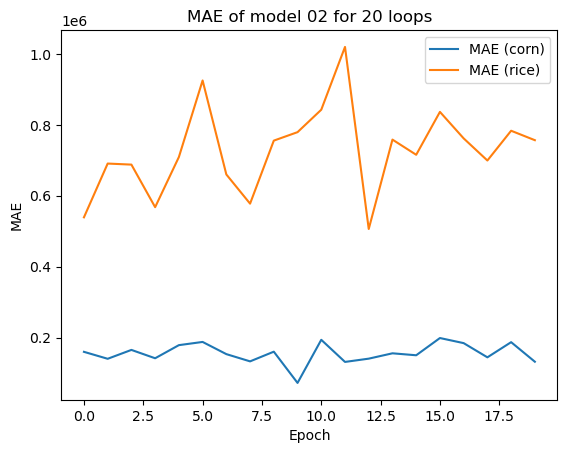

In [236]:
visual_data.plot()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE of model 02 in 20 loops')
plt.show()

### Comment
-   The prediction of corn always lower than 200,000
-   The prediction of Rice always higher than 400,000 and peak at more than 1,000,000
-   The prediction of corn has a lower MAE than Rice in 20 runs.